## Inference

This pipeline takes the cleaned and feature engineered dataset from Results and uses it to generate features for To_Predict dataset

In [41]:
import os
import missingno as msno
import pandas as pd
import numpy as np
from pathlib import Path
from RDS_credentials import *

Call results from To_Predict folder

In [21]:
path = Path('/home/ceri/DS_project/To_Predict')

for predict_folders in os.listdir(path):
    
    new_path = Path(f'/home/ceri/DS_project/To_Predict/{predict_folders}')
    
    for files in os.listdir(new_path):
        
        predict = pd.read_csv(f'To_Predict/{predict_folders}/Results_2022_{predict_folders}.csv', encoding = 'unicode_escape')
        
        try: # append to dataframe 
            all_predict = all_predict.append(predict)
        
        except:# create first dataframe
            all_predict = predict

/tmp/ipykernel_6644/2494937962.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_predict = all_predict.append(predict)
/tmp/ipykernel_6644/2494937962.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_predict = all_predict.append(predict)
/tmp/ipykernel_6644/2494937962.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_predict = all_predict.append(predict)
/tmp/ipykernel_6644/2494937962.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_predict = all_predict.append(predict)
/tmp/ipykernel_6644/2494937962.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

In [22]:
# remove end link numbers (retain year only)
all_predict['Link'] = all_predict['Link'].apply(lambda x: x[:(x.rfind('/') + 5)])

In [23]:
#drop duplicate values
all_predict = all_predict.drop_duplicates(subset ="Link")

Call ELO dict from To_Predict folder

In [24]:
path = Path('/home/ceri/DS_project/To_Predict')

for predict_folders in os.listdir(path):
    
    new_path = Path(f'/home/ceri/DS_project/To_Predict/{predict_folders}')
    
    for files in os.listdir(new_path):
        
        elo_dict = pd.read_pickle(f'/home/ceri/DS_project/To_Predict/{predict_folders}/elo_dict.pkl')
        elo_df = pd.DataFrame.from_dict(elo_dict, orient='index')
        
        try: # append to dataframe 
            all_elo = all_elo.append(elo_df)
        
        except:# create first dataframe
            all_elo = elo_df

/tmp/ipykernel_6644/2548965706.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_elo = all_elo.append(elo_df)
/tmp/ipykernel_6644/2548965706.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_elo = all_elo.append(elo_df)
/tmp/ipykernel_6644/2548965706.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_elo = all_elo.append(elo_df)
/tmp/ipykernel_6644/2548965706.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_elo = all_elo.append(elo_df)
/tmp/ipykernel_6644/2548965706.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all

In [25]:
all_elo = all_elo.reset_index(level=0)
all_elo = all_elo.rename(columns={'index': 'Link'})
all_elo['Link'] = all_elo['Link'].apply(lambda x: x[:(x.rfind('/') + 5)])
all_elo = all_elo.drop_duplicates(subset ="Link") 
all_elo.head()

,Link,Elo_home,Elo_away
0,https://www.besoccer.com/match/eibar/ud-palmas...,73,61
1,https://www.besoccer.com/match/amorebieta/mira...,39,55
2,https://www.besoccer.com/match/leganes/malaga/...,62,60
3,https://www.besoccer.com/match/valladolid/alme...,71,60
4,https://www.besoccer.com/match/sporting-gijon/...,68,56


Merge Elo and results datasets

In [26]:
# merge with main dataframe
merge_df = all_predict.merge(all_elo, on='Link')

In [27]:
merge_df = merge_df.loc[:, ~merge_df.columns.str.contains('^Unnamed')]
merge_df.head()

,Home_Team,Away_Team,Link,Season,Round,League,Elo_home,Elo_away
0,Eibar,Las Palmas,https://www.besoccer.com/match/eibar/ud-palmas...,2022,36,segunda_division,73,61
1,SD Amorebieta,MirandÃ©s,https://www.besoccer.com/match/amorebieta/mira...,2022,36,segunda_division,39,55
2,LeganÃ©s,MÃ¡laga,https://www.besoccer.com/match/leganes/malaga/...,2022,36,segunda_division,62,60
3,Real Valladolid,AlmerÃ­a,https://www.besoccer.com/match/valladolid/alme...,2022,36,segunda_division,71,60
4,Real Sporting,Real Oviedo,https://www.besoccer.com/match/sporting-gijon/...,2022,36,segunda_division,68,56


In [28]:
merge_df['Round'].unique()
merge_df.shape

(138, 8)

<AxesSubplot:>

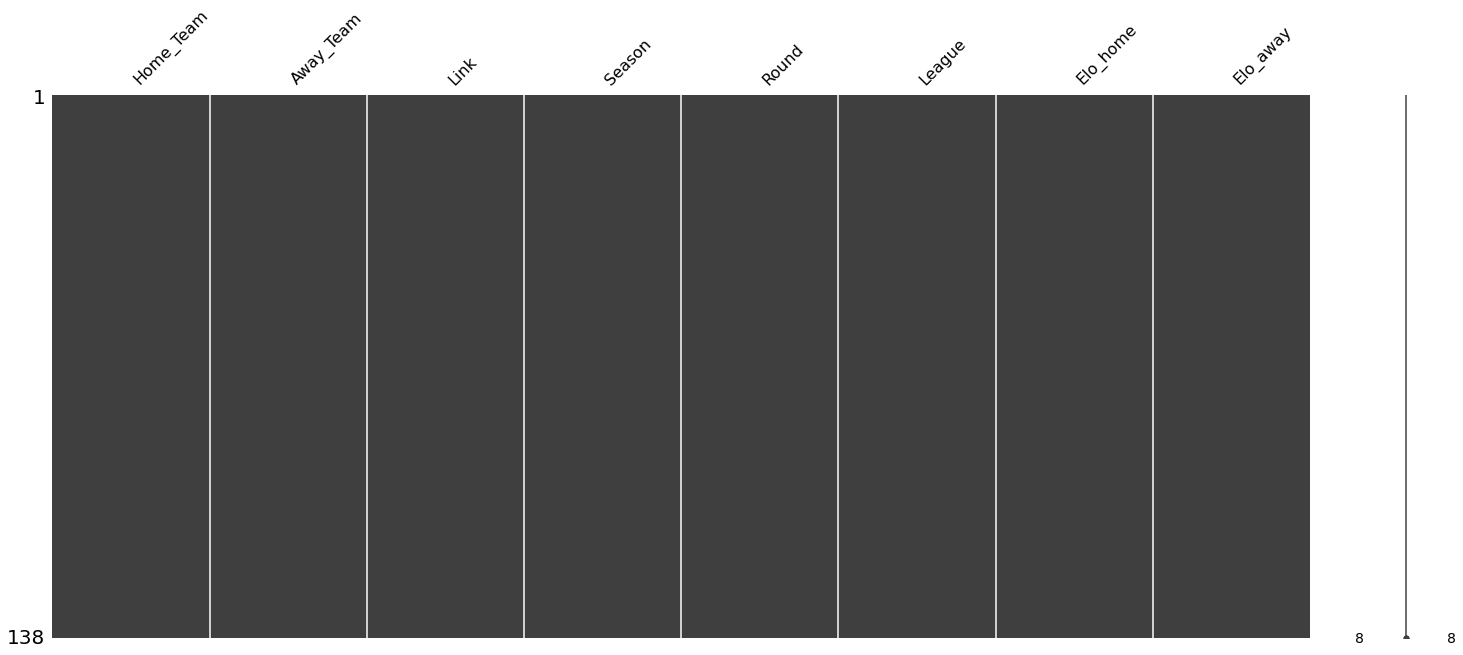

In [29]:
msno.matrix(merge_df)

save to csv for pipeline

In [13]:
merge_df.to_csv('to_predict_unclean.csv')

'to_predict_unclean.csv' is then taken through pipeline.py where it is cleaned and features are added. Here we call the post pipeline dataset and the Results portion of the dataframe is removed so we are left with only the To_Predict dataset.


In [30]:
# data cleaned and features are added from pipeline 
cleaned_df = pd.read_csv('cleaned_results_predict.csv')

In [38]:
cleaned_df = cleaned_df.loc[:, ~cleaned_df.columns.str.contains('^Unnamed')]
cleaned_df

,Home_Team,Away_Team,Result,Link,Season,Round,League,Elo_home,Elo_away,Home_Goals,Away_Goals,Outcome,Home_Win,Home_Attack,Away_Attack,Home_Team_Outcome_sum_10,Away_Team_Outcome_sum_10
0,Huesca,Eibar,2-0,https://www.besoccer.com/match/huesca/eibar/2022,2022,1,segunda_division,58,65,2.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0
1,Real Zaragoza,UD Ibiza,0-0,https://www.besoccer.com/match/real-zaragoza/i...,2022,1,segunda_division,61,49,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,R. Sociedad B,LeganÃ©s,1-0,https://www.besoccer.com/match/real-sociedad-b...,2022,1,segunda_division,51,63,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0
3,Girona,SD Amorebieta,2-0,https://www.besoccer.com/match/girona-fc/amore...,2022,1,segunda_division,66,44,2.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0
4,Ponferradina,AlcorcÃ³n,1-0,https://www.besoccer.com/match/ponferradina-sd...,2022,1,segunda_division,52,57,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,Stoke City,Bristol City,NaN,https://www.besoccer.com/match/stoke-city/bris...,2022,42,championship,77,52,NaN,NaN,NaN,NaN,1.013130,1.165000,-2.0,6.0
4365,Swansea City,Barnsley,NaN,https://www.besoccer.com/match/swansea-city-af...,2022,42,championship,75,51,NaN,NaN,NaN,NaN,0.917532,0.596200,0.0,7.0
4366,West Bromwich Albion,Blackpool,NaN,https://www.besoccer.com/match/west-bromwich/b...,2022,42,championship,75,39,NaN,NaN,NaN,NaN,0.984380,1.043498,2.0,4.0
4367,Huddersfield Town,Queens Park Rangers,NaN,https://www.besoccer.com/match/huddersfield-to...,2022,42,championship,55,56,NaN,NaN,NaN,NaN,1.017901,1.287756,2.0,0.0


In [44]:
to_predict_clean_df = cleaned_df.loc[cleaned_df['Result'].isna()]

In [46]:
to_predict_clean_df = to_predict_clean_df.reset_index(level=0)

In [48]:
to_predict_clean_df = to_predict_clean_df.loc[:, ~to_predict_clean_df.columns.str.contains('index')]
to_predict_clean_df

,Home_Team,Away_Team,Result,Link,Season,Round,League,Elo_home,Elo_away,Home_Goals,Away_Goals,Outcome,Home_Win,Home_Attack,Away_Attack,Home_Team_Outcome_sum_10,Away_Team_Outcome_sum_10
0,Arouca,CD Santa Clara,NaN,https://www.besoccer.com/match/arouca/santa-cl...,2022,30,primeira_liga,68,52,NaN,NaN,NaN,NaN,0.671849,0.677116,-3.0,4.0
1,FamalicÃ£o,Gil Vicente,NaN,https://www.besoccer.com/match/famalicao/gil-v...,2022,30,primeira_liga,53,56,NaN,NaN,NaN,NaN,0.725146,1.073496,0.0,-5.0
2,VitÃ³ria GuimarÃ£es,PaÃ§os de Ferreira,NaN,https://www.besoccer.com/match/vitoria-guimara...,2022,30,primeira_liga,75,72,NaN,NaN,NaN,NaN,1.343684,0.505822,3.0,1.0
3,Moreirense,Tondela,NaN,https://www.besoccer.com/match/moreirense-fc/t...,2022,30,primeira_liga,68,59,NaN,NaN,NaN,NaN,0.780925,0.894879,-4.0,4.0
4,MarÃ­timo,Boavista,NaN,https://www.besoccer.com/match/maritimo/boavis...,2022,30,primeira_liga,74,63,NaN,NaN,NaN,NaN,0.777801,0.843537,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Stoke City,Bristol City,NaN,https://www.besoccer.com/match/stoke-city/bris...,2022,42,championship,77,52,NaN,NaN,NaN,NaN,1.013130,1.165000,-2.0,6.0
134,Swansea City,Barnsley,NaN,https://www.besoccer.com/match/swansea-city-af...,2022,42,championship,75,51,NaN,NaN,NaN,NaN,0.917532,0.596200,0.0,7.0
135,West Bromwich Albion,Blackpool,NaN,https://www.besoccer.com/match/west-bromwich/b...,2022,42,championship,75,39,NaN,NaN,NaN,NaN,0.984380,1.043498,2.0,4.0
136,Huddersfield Town,Queens Park Rangers,NaN,https://www.besoccer.com/match/huddersfield-to...,2022,42,championship,55,56,NaN,NaN,NaN,NaN,1.017901,1.287756,2.0,0.0


In [50]:
to_predict_clean_df['Round'].unique()

array([30, 31, 32, 33, 34, 35, 36, 42])

This is a dataset with all the X features and without the y label Outcome column. It will be passed through the model to obtain the Outcome.

In [49]:
to_predict_clean_df.to_csv('to_predict.csv')